In [1]:
import krstc_utils as kutils
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df, runtype = kutils.load_dsp(run=83,
                     params=[['trapEmax','tp_0','tp_50', 'tp_20', 'stp_20', 'triE']], verbose=False)
df['ToE'] = df['triE']/df['trapEmax']
print(df.cycle.unique())
df


[3461 3462 3463 ... 3576 3577 3578]


,trapEmax,tp_0,tp_50,tp_20,stp_20,triE,trapEmax_cal_keV,pulse_rise_time_ns,run,cycle,runtime_s,ToE
0,191.629562,39710.0,39890.0,39820.0,39810.0,94.553970,82.724342,100.0,83,3461,1498.422083,0.493421
1,37.535671,39260.0,39350.0,39280.0,39260.0,27.208134,16.309874,0.0,83,3461,1498.422083,0.724861
2,1781.767700,39680.0,40320.0,40210.0,40200.0,1047.411621,768.073914,520.0,83,3461,1498.422083,0.587850
3,1990.586914,39400.0,40410.0,40300.0,40280.0,1169.642944,858.074951,880.0,83,3461,1498.422083,0.587587
4,13.853807,38140.0,39410.0,38330.0,38120.0,13.301734,6.102991,-20.0,83,3461,1498.422083,0.960150
...,...,...,...,...,...,...,...,...,...,...,...,...
115389,385.457825,39180.0,40100.0,39990.0,39980.0,230.125320,166.264328,800.0,83,3578,1499.753282,0.597018
115390,1444.228516,39520.0,40130.0,40040.0,40030.0,813.459473,622.594482,510.0,83,3578,1499.753282,0.563248
115391,342.836487,39470.0,40050.0,39930.0,39920.0,185.610764,147.894531,450.0,83,3578,1499.753282,0.541397
115392,2548.177002,39760.0,40450.0,40340.0,40320.0,1501.033447,1098.396240,560.0,83,3578,1499.753282,0.589062


Text(0.5, 1.0, 'Superpulses for different event types (aligned at tp_50)')

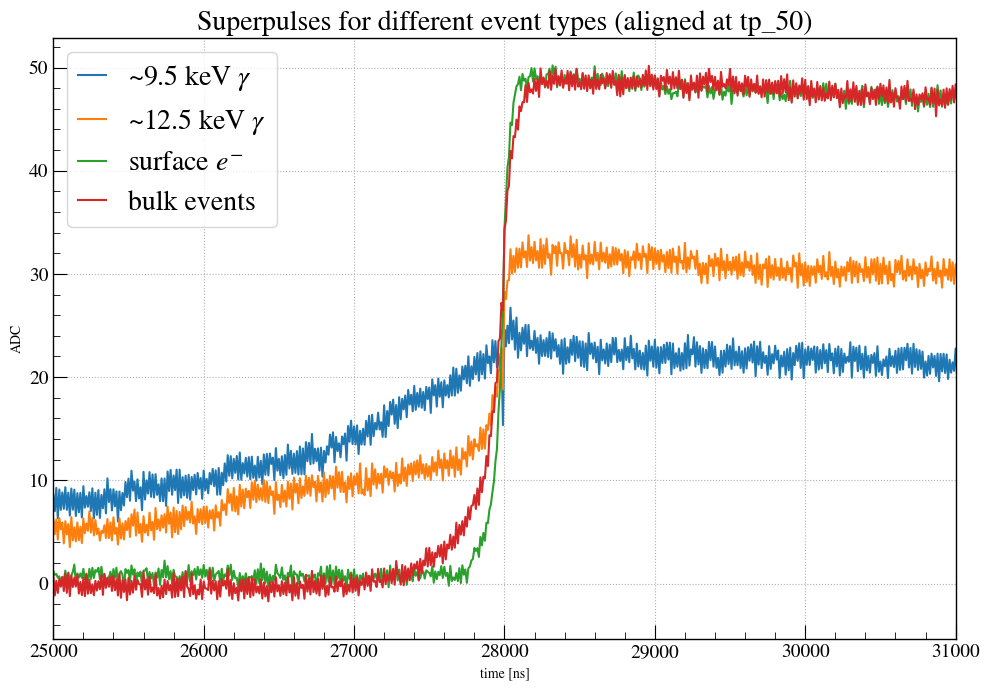

In [44]:
lw = 1.5
nwfs = 100
random_state = 5
align_at = 'tp_50'

superpulses = []


# 9.4 keV gamma events
ecal_range = [9.5, 10.5]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='~9.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)



# 12.5 keV gamma events
ecal_range = [13,14]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='~12.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)

# surface electron events
ecal_range = [20,21]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='surface $e^{-}$',
               lw=lw)
superpulses.append(sp)


# bulk events
ecal_range = [20,21]
toe_range = [0.48, 0.52]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='bulk events',
               lw=lw)
superpulses.append(sp)
plt.ylabel('ADC')
plt.title('Superpulses for different event types (aligned at '+align_at+')')


Text(0.5, 0.98, 'FFT of superpulses, run 83')

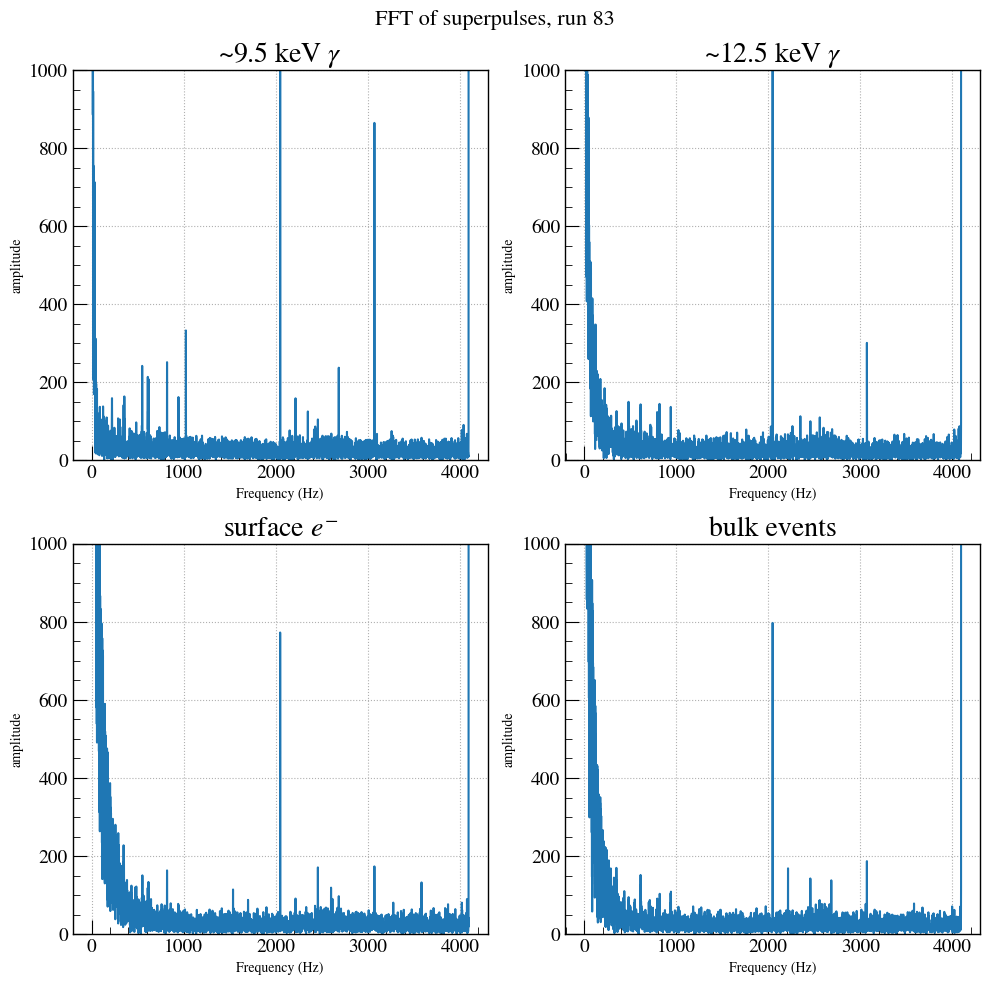

In [46]:
titles = ['~9.5 keV $\gamma$', '~12.5 keV $\gamma$', 'surface $e^{-}$', 'bulk events']
# plot all superpulses in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        # fft superpulse
        sp_fft = np.fft.rfft(superpulses[i*2+j])

        #freq = np.fft.rfftfreq(len(superpulses[i*2+j]), d=1/100e6)
        #print(freq[np.argmax(np.abs(sp_fft))])
        ax[i,j].plot(np.abs(sp_fft), lw=1.5)
        #ax[i,j].set_title(superpulses[i*2+j].name)
        ax[i,j].set_ylabel('amplitude')
        ax[i,j].set_xlabel('Frequency (Hz)')
        ax[i,j].set_ylim(0,1000)
        # titles
        ax[i,j].set_title(titles[i*2+j])

plt.tight_layout()
# set title
fig.suptitle('FFT of superpulses, run 83', fontsize=16)